## Final Project Submission

Please fill out:
* Student name: JESSYCA APERI
* Student pace: part time
* Scheduled project review date/time: 26th March 
* Instructor name: Samwel Jane
* Blog post URL: https://github.com/aperi-j/dsc-phase-2-project


# Business Problem

I am hired by a start-up that intends to venture into the real estate space.The firm finds already existing houses, renovates them if necessary and resells them.The business problem i intend to solve is:
   * Analyse the data and find what factors three are associated with the highly priced houses so that they are considered            during the initial buy by the firm and also so that they are exploited during renovations in order to turn a high profit.
   * Predict sale prices of the houses. 
        

In [41]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression 

warnings.filterwarnings('ignore')


In [42]:
from sklearn.linear_model import LinearRegression 


In [43]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [44]:
#I drop all the columns i may not need from the earlier instructions
data.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True, axis = 1)
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

# Business Problem

# DATA CLEANING 

# Dealing with missing values

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [46]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [47]:
data.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [48]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [8]:
#%percentage of missing values
def percentage_null(x):
    len_ = len(x)
    null_ = x.isnull().sum()
    return (null_ / len_) * 100

print('The percentage of nulls in the primary_title column is: {}'.format(percentage_null(data['waterfront'])))




The percentage of nulls in the primary_title column is: 11.00152798999861


Since the percentage of nulls is not so large i will drop the rows with missing values

In [9]:
data.dropna(inplace= True)
data.isnull().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

# Dealing with outliers

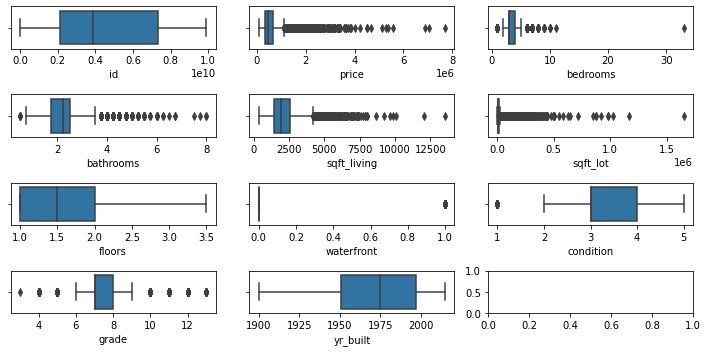

In [10]:
#identifying outliers
fig, axs = plt.subplots(4,3, figsize = (10,5))
plt1 = sns.boxplot(data['id'], ax = axs[0,0])
plt2 = sns.boxplot(data['price'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['sqft_living'], ax = axs[1,1])
plt3 = sns.boxplot(data['sqft_lot'], ax = axs[1,2])
plt1 = sns.boxplot(data['floors'], ax = axs[2,0])
plt2 = sns.boxplot(data['waterfront'], ax = axs[2,1])
plt3 = sns.boxplot(data['condition'], ax = axs[2,2])
plt1 = sns.boxplot(data['grade'], ax = axs[3,0])
plt2 = sns.boxplot(data['yr_built'], ax = axs[3,1])

plt.tight_layout()

From the plots above, the columns that have outliers are price, bedrooms, bathrooms, sqft_living, sqft_lot, waterfront, condition and grade.
I will not interfere with the outliers in price column since it is our target column


In [11]:
#Removing outliers
#Defining a function to detect outliers
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 -Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [12]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [13]:
#Detecting outliers and removing them
index_list = []
for feature in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'condition', 'grade']:
    index_list.extend(outliers(data, feature))


In [14]:
def remove(df, ls):
    ls = sorted(set(ls))
    df.drop(ls, inplace = True)
    return df
remove(data, index_list)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009


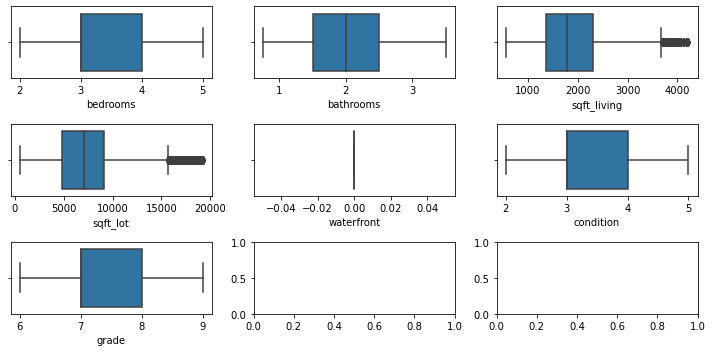

In [15]:
#Check for outliers again
fig, axs = plt.subplots(3,3, figsize = (10,5))

plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,0])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[0,1])
plt2 = sns.boxplot(data['sqft_living'], ax = axs[0,2])
plt3 = sns.boxplot(data['sqft_lot'], ax = axs[1,0])
plt2 = sns.boxplot(data['waterfront'], ax = axs[1,1])
plt3 = sns.boxplot(data['condition'], ax = axs[1,2])
plt1 = sns.boxplot(data['grade'], ax = axs[2,0])

plt.tight_layout()

As we can see we cleared out all the outliers and our data is ready for exploration and feature selection.

# Data Exploration and Feature-Selection

Let us explore the relationship between the features  and our target variable['price']

In [16]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009


<AxesSubplot:>

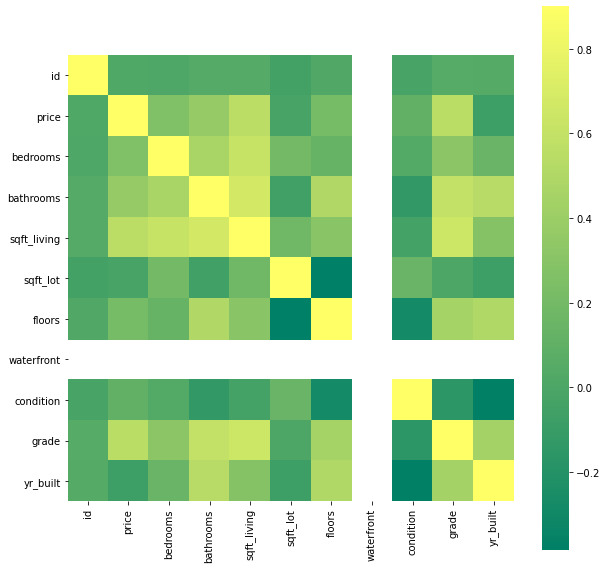

In [17]:
#Plotting a heatmap
corr_matrix = data.corr()
plt.subplots(figsize =(10, 10))
sns.heatmap(corr_matrix, vmax =0.9, square = True, cmap = 'summer')

I will drop the ['waterfront'] column to get a clearer picture and also drop it because it has no correlation 

In [18]:
data.drop('waterfront', inplace =True, axis = 1)
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built'],
      dtype='object')

<AxesSubplot:>

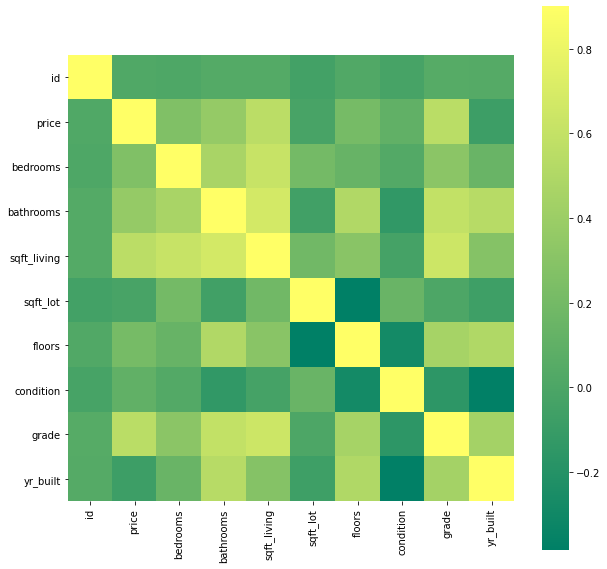

In [19]:
corr_matrix = data.corr()
plt.subplots(figsize =(10, 10))

sns.heatmap(corr_matrix, vmax =0.9, square = True, cmap = 'summer')

In [20]:
#Plotting a heatmap to investigate relationships
data.corr().sort_values('price', ascending = False)['price']

price          1.000000
sqft_living    0.558862
grade          0.552217
bathrooms      0.365167
bedrooms       0.259084
floors         0.209045
condition      0.105010
id             0.020554
sqft_lot      -0.019565
yr_built      -0.076119
Name: price, dtype: float64

In [21]:
key_observation = print('From the plot above of the heatmap and the numerical values the top three variables sqft_living, grade and bathrooms are at most moderately correlated to the price.. and when considering what variables have the most association , I would consider the sqft_living, grade and bathrooms in the house')

From the plot above of the heatmap and the numerical values the top three variables sqft_living, grade and bathrooms are at most moderately correlated to the price.. and when considering what variables have the most association , I would consider the sqft_living, grade and bathrooms in the house


# Exploratory Data Analysis 

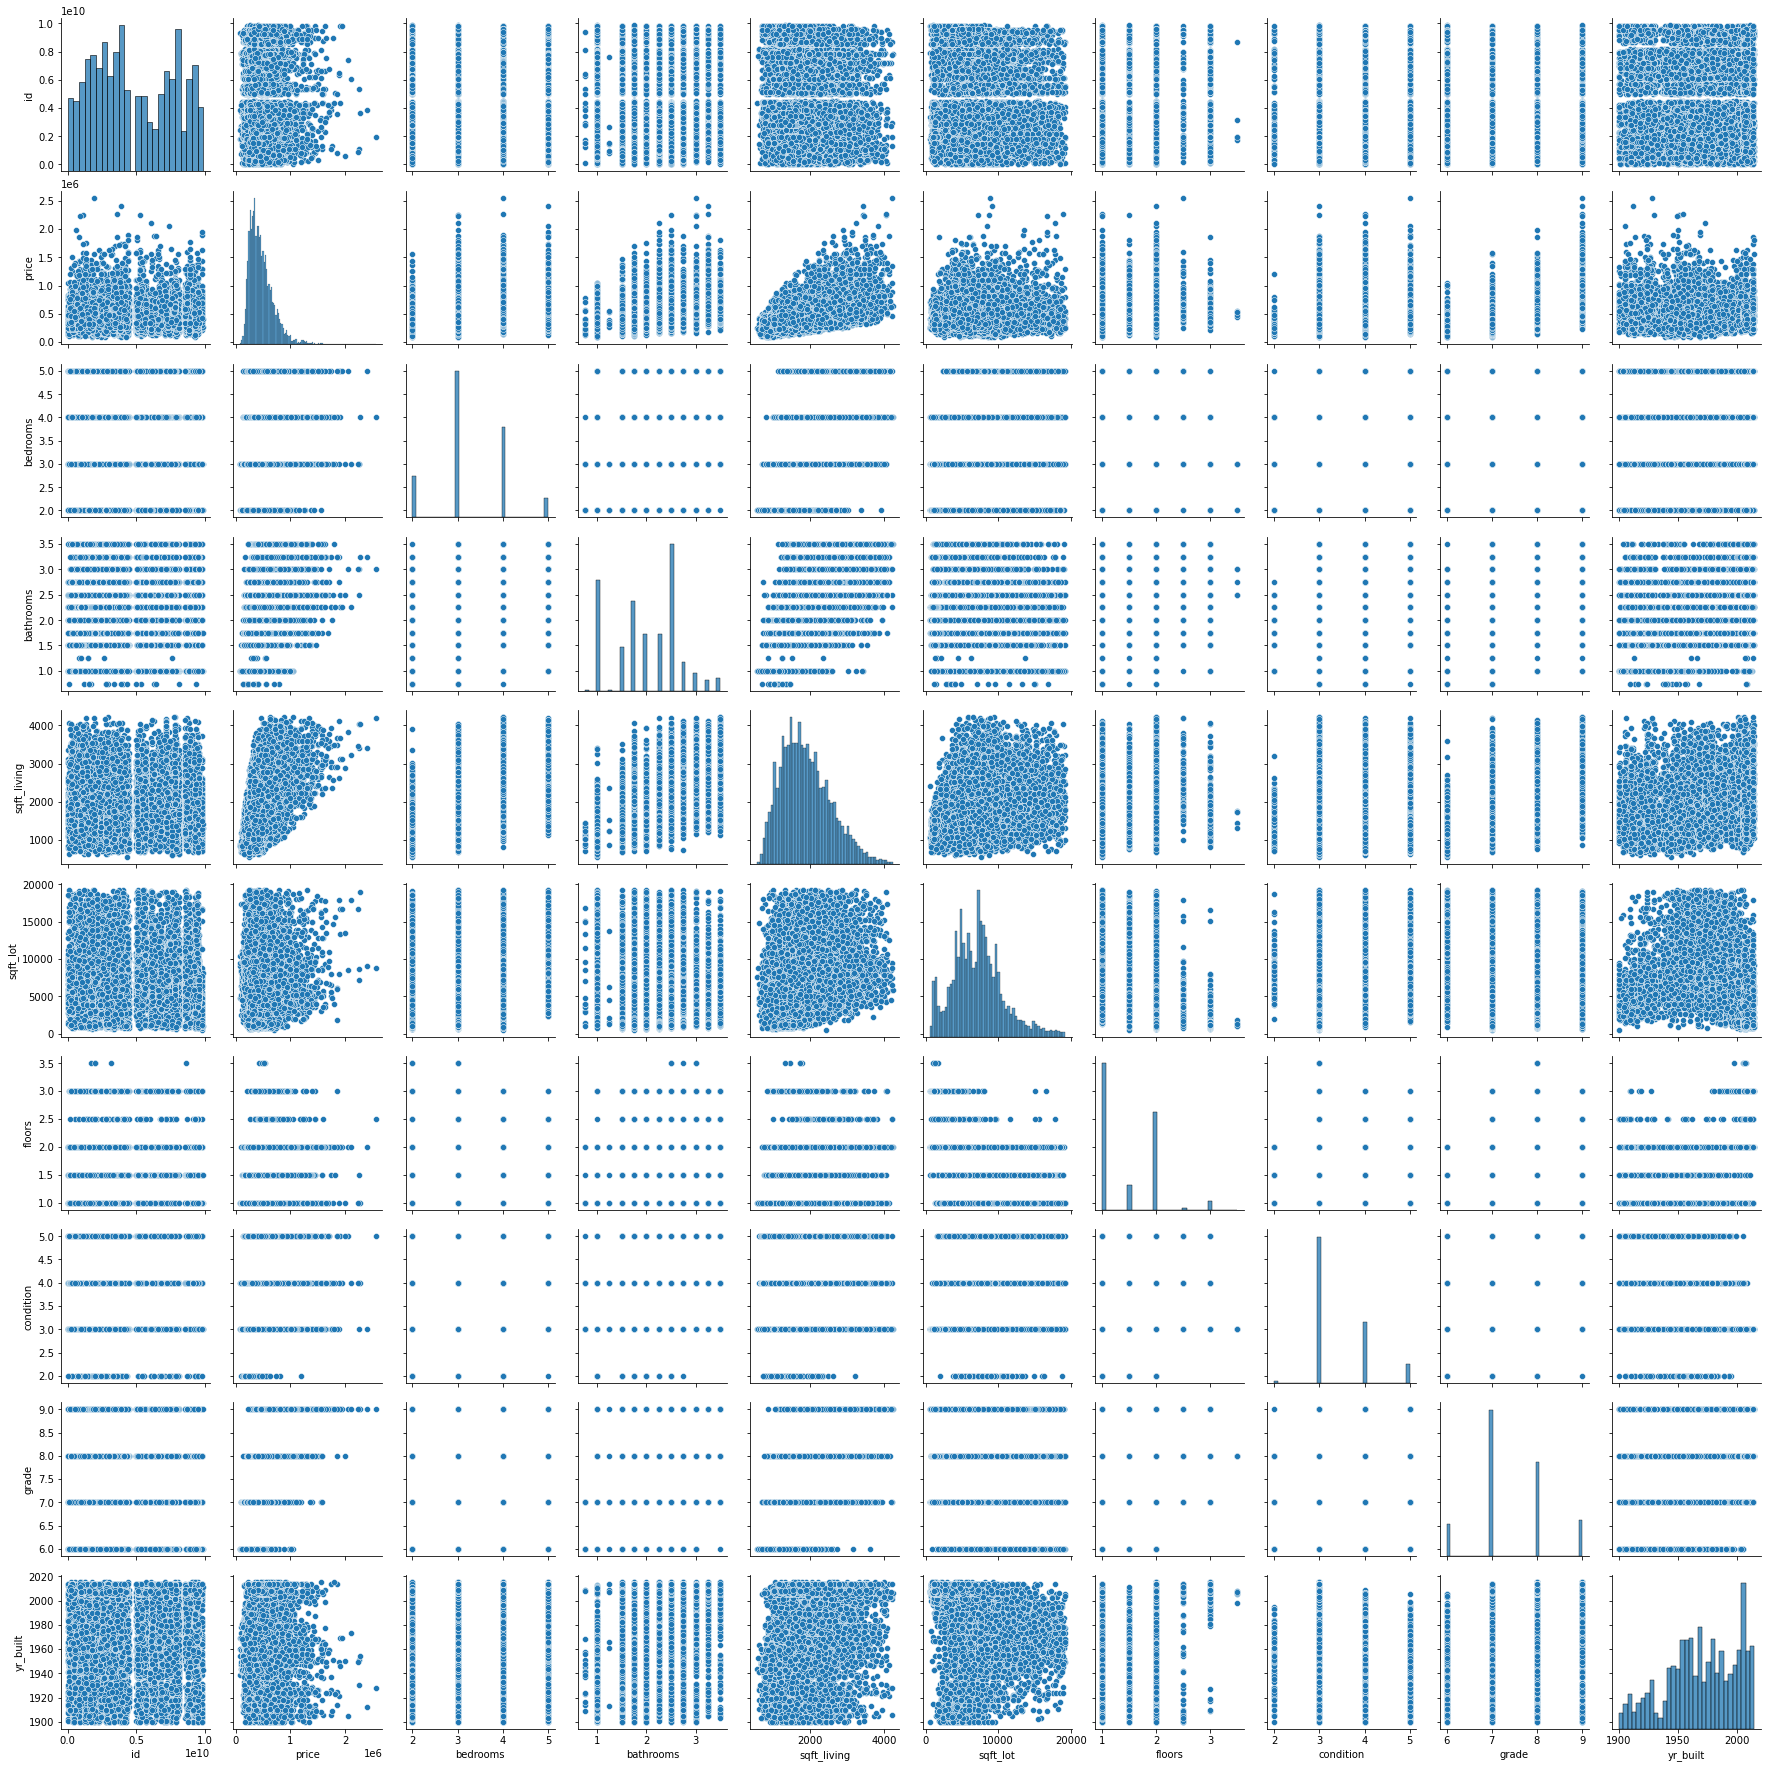

In [22]:
sns.pairplot(data)

I will plot the relationship between between the price of the house and the most correlated variables

# Exploring the data

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

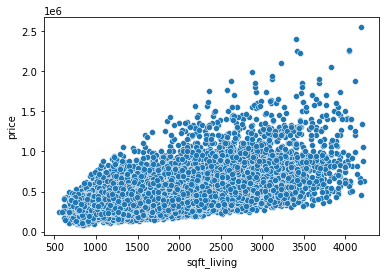

In [23]:
#Relationship between price and the sqft of house
sns.scatterplot(data= data, x = 'sqft_living', y = 'price')

<AxesSubplot:xlabel='grade', ylabel='price'>

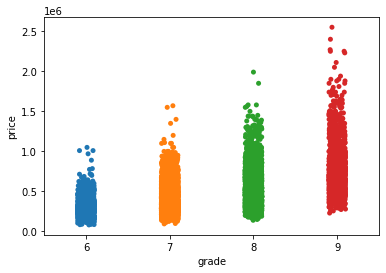

In [24]:
#Relationship between grade and the sqft of house
sns.stripplot(data= data, x = 'grade', y = 'price')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

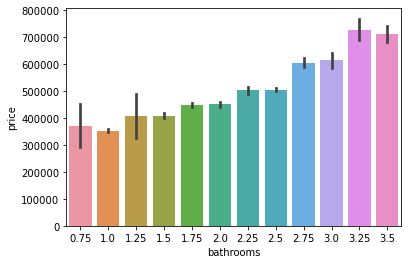

In [25]:
#Relationship between bathrooms and the sqft of house
sns.barplot(data= data, x = 'bathrooms', y = 'price')

The heatmap is meant to check for collinearity among my predictors.
I am mainly interested in the top three highly correlated. This is
'sqft_living', 'grade' and 'bathrooms'.From my heatmap above 'sqft_living' is amoderately correlated to 'grade' -0.64 and also moderately correlated to the 'bathrooms' -0.68.
So it will be dropped
The same can also be said for the relationship between 'grade' and 'sqft_living' - 0.64, and also with bathrooms - 0.59(moderately correlated.)
These are low levels of correlation so i chose to ignore them and use them on my model for prediction.

# Feature Selection

I will now conduct feature selection by detecting multicollinearity and deleting them in order to remain with my columns of interesting 

In [26]:
cols = data.columns
cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built'],
      dtype='object')

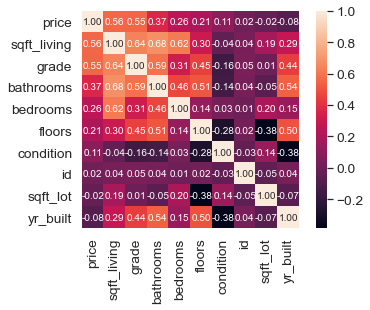

In [27]:
#Heatmap with price as column of interest
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [29]:
#Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
vif_data

,feature,VIF
0,id,3.791231
1,price,1.824168
2,bedrooms,1.694366
3,bathrooms,2.390862
4,sqft_living,3.466058
5,sqft_lot,1.399401
6,floors,1.835514
7,condition,1.107083
8,grade,2.429157
9,yr_built,195.268334


From the Variance Inflation factor yr_built is the highest thus I will drop it.My cut-off for VIF is if it is greater than 5, if greater than 5 it will cause multicollinearity hence i will dro yr_built

In [30]:
data.drop('yr_built', axis = 1, inplace = True)

# MODEDLLING

In [31]:
data.corr().sort_values('price', ascending = False)['price']

price          1.000000
sqft_living    0.558862
grade          0.552217
bathrooms      0.365167
bedrooms       0.259084
floors         0.209045
condition      0.105010
id             0.020554
sqft_lot      -0.019565
Name: price, dtype: float64

In [32]:
#Identifying the independent and dependent variables
X = data[['sqft_living', 'grade']] #independent var
y = data['price']  #dependent variables

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#Splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [35]:
#The model
lm = LinearRegression() 

lm.fit(X_train,y_train) 


LinearRegression()

# Model Evaluation

In [36]:
print(lm.intercept_)

-421753.06872399466


In [37]:
#the coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
sqft_living,120.478986
grade,89313.823934


# Predictions from our Linear Regression Model

In [38]:
predictions = lm.predict(X_test)  

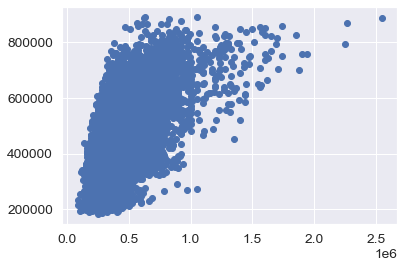

In [39]:
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='price', ylabel='Density'>

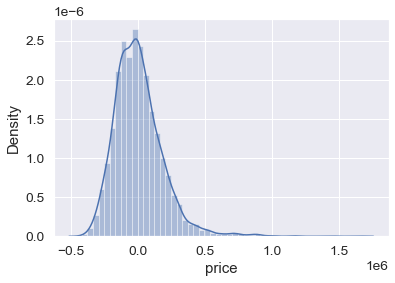

In [40]:
sns.distplot((y_test - predictions), bins= 50)

# Conclusions
